# Import

In [1]:
import sys

root_dir = '../../'
if root_dir not in sys.path:
    sys.path.append(root_dir)

import torch
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

from modules import losses, models, samplers, regularizers, evaluators, trainers, datasets, distributions

# DataSet

In [2]:
dataset = datasets.ML100k()
n_user = dataset.n_user
n_item = dataset.n_item
train_set, test_set = dataset.get_train_and_test_set()

# device setting
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
train_set = torch.LongTensor(train_set).to(device)
test_set = torch.LongTensor(test_set).to(device)

# Evaluator

In [3]:
ks = [5, 10, 50]
recall = evaluators.RecallEvaluator(test_set, ks)

# Sampler

In [4]:
sampler = samplers.BaseSampler(train_set, n_user, n_item, device=device, strict_negative=False)

# Params

In [5]:
# Hyperparameters
lr = 1e-3
n_dim = 10
n_batch = 256
n_epoch = 50
valid_per_epoch = 50
dist = distributions.Gamma()
no_progressbar = True

# Both

In [14]:
n_both_samples = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

re1 = []
for n_sample in n_both_samples:
    print(f'n_item_sample={n_sample}')
    print(f'n_user_sample={n_sample}')
    model = models.MutualProximityCML(
        n_user, n_item, dist, n_dim,
        n_item_sample=n_sample,
        n_user_sample=n_sample
    ).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = losses.SumTripletLoss(margin=1).to(device)
    trainer = trainers.BaseTrainer(model, optimizer, criterion, sampler, no_progressbar)
    trainer.fit(n_batch, n_epoch, recall, valid_per_epoch)
    display(trainer.valid_scores)
    # k=10を追加
    re1.append(trainer.valid_scores.iloc[-1, 1])

n_item_sample=10
n_user_sample=10


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.062266,0.124097,0.526295,0,NaN
0,0.310193,0.473334,0.842594,50,0.235226


n_item_sample=20
n_user_sample=20


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.062390,0.117820,0.523098,0,NaN
0,0.316279,0.478525,0.847433,50,0.235117


n_item_sample=30
n_user_sample=30


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.064485,0.126956,0.526553,0,NaN
0,0.320083,0.485960,0.852619,50,0.233838


n_item_sample=40
n_user_sample=40


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.061367,0.121378,0.527000,0,NaN
0,0.323950,0.490795,0.852599,50,0.234734


n_item_sample=50
n_user_sample=50


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.059776,0.126074,0.524272,0,NaN
0,0.320147,0.488902,0.850039,50,0.235006


n_item_sample=60
n_user_sample=60


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.067534,0.124560,0.527799,0,NaN
0,0.327451,0.494445,0.854384,50,0.233866


n_item_sample=70
n_user_sample=70


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.051582,0.113819,0.519235,0,NaN
0,0.325579,0.488099,0.854151,50,0.235942


n_item_sample=80
n_user_sample=80


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.069270,0.128324,0.522386,0,NaN
0,0.318841,0.482390,0.853546,50,0.237781


n_item_sample=90
n_user_sample=90


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.064471,0.123379,0.529387,0,NaN
0,0.330262,0.496666,0.858553,50,0.234033


n_item_sample=100
n_user_sample=100


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.066521,0.129774,0.529461,0,NaN
0,0.313798,0.479121,0.849986,50,0.237751


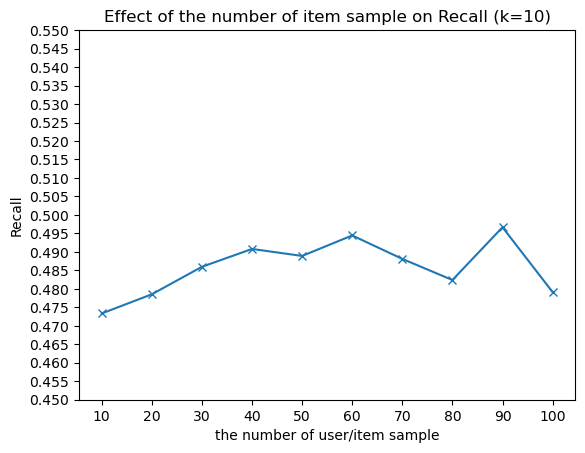

In [15]:
plt.plot(n_both_samples, re1, marker='x')
plt.title('Effect of the number of item sample on Recall (k=10)')
plt.xlabel('the number of user/item sample')
plt.ylabel('Recall')
plt.ylim(0.45, 0.55)
plt.xticks(n_both_samples)
plt.yticks(np.arange(0.45, 0.55, 0.005))
plt.show()

In [12]:
n_both_samples = [100, 200, 300, 400, 500, 600, 700, 800, 900]

re2 = []
for n_sample in n_both_samples:
    print(f'n_item_sample={n_sample}')
    print(f'n_user_sample={n_sample}')
    model = models.MutualProximityCML(
        n_user, n_item, dist, n_dim,
        n_item_sample=n_sample,
        n_user_sample=n_sample
    ).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = losses.SumTripletLoss(margin=1).to(device)
    trainer = trainers.BaseTrainer(model, optimizer, criterion, sampler, no_progressbar)
    trainer.fit(n_batch, n_epoch, recall, valid_per_epoch)
    display(trainer.valid_scores)
    # k=10を追加
    re2.append(trainer.valid_scores.iloc[-1, 1])

n_item_sample=100
n_user_sample=100


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.062494,0.129291,0.527551,0,NaN
0,0.315812,0.485131,0.852659,50,0.235788


n_item_sample=200
n_user_sample=200


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.064100,0.125153,0.523137,0,NaN
0,0.327257,0.494184,0.854224,50,0.236536


n_item_sample=300
n_user_sample=300


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.064922,0.131877,0.529871,0,NaN
0,0.322732,0.489238,0.851614,50,0.236698


n_item_sample=400
n_user_sample=400


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.064218,0.119939,0.528879,0,NaN
0,0.317673,0.483713,0.850803,50,0.238237


n_item_sample=500
n_user_sample=500


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.062080,0.125617,0.522414,0,NaN
0,0.322412,0.484890,0.856675,50,0.236367


n_item_sample=600
n_user_sample=600


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.067223,0.122865,0.523770,0,NaN
0,0.330618,0.491740,0.851515,50,0.236779


n_item_sample=700
n_user_sample=700


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.064307,0.124227,0.523382,0,NaN
0,0.325828,0.495668,0.854644,50,0.237901


n_item_sample=800
n_user_sample=800


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.065935,0.122708,0.524872,0,NaN
0,0.323895,0.494469,0.855123,50,0.236623


n_item_sample=900
n_user_sample=900


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.062597,0.128164,0.526127,0,NaN
0,0.323735,0.493842,0.854717,50,0.235552


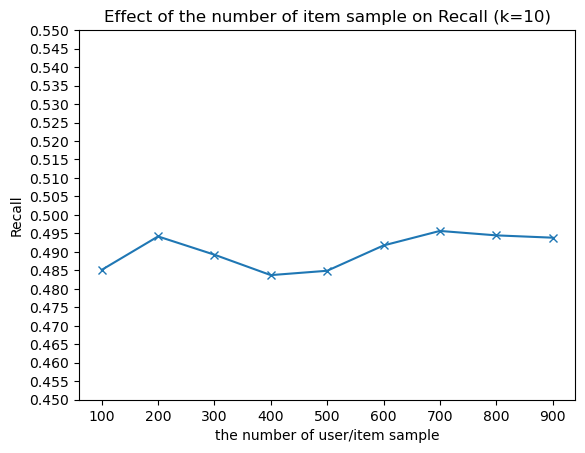

In [13]:
plt.plot(n_both_samples, re2, marker='x')
plt.title('Effect of the number of item sample on Recall (k=10)')
plt.xlabel('the number of user/item sample')
plt.ylabel('Recall')
plt.ylim(0.45, 0.55)
plt.xticks(n_both_samples)
plt.yticks(np.arange(0.45, 0.55, 0.005))
plt.show()

# The number of item sample
The number of sampling to computing parameters of the distribution of distances from a specific user to all items. 

In [16]:
n_item_samples = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
n_user_sample = 100

re3 = []
for n_item_sample in n_item_samples:
    print(f'n_item_sample={n_item_sample}')
    print(f'n_user_sample={n_user_sample}')
    model = models.MutualProximityCML(
        n_user, n_item, dist, n_dim,
        n_item_sample=n_item_sample,
        n_user_sample=n_user_sample
    ).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = losses.SumTripletLoss(margin=1).to(device)
    trainer = trainers.BaseTrainer(model, optimizer, criterion, sampler, no_progressbar)
    trainer.fit(n_batch, n_epoch, recall, valid_per_epoch)
    display(trainer.valid_scores)
    # k=10を追加
    re3.append(trainer.valid_scores.iloc[-1, 1])

n_item_sample=10
n_user_sample=100


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.064277,0.132596,0.522950,0,NaN
0,0.316302,0.483484,0.849552,50,0.236093


n_item_sample=20
n_user_sample=100


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.059786,0.129389,0.525158,0,NaN
0,0.320211,0.489256,0.852417,50,0.237275


n_item_sample=30
n_user_sample=100


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.067200,0.129633,0.526313,0,NaN
0,0.323717,0.486538,0.849571,50,0.23598


n_item_sample=40
n_user_sample=100


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.063526,0.12118,0.527335,0,NaN
0,0.324125,0.48808,0.850691,50,0.234196


n_item_sample=50
n_user_sample=100


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.062769,0.121948,0.524754,0,NaN
0,0.322576,0.489283,0.857450,50,0.236166


n_item_sample=60
n_user_sample=100


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.056188,0.118042,0.527416,0,NaN
0,0.330807,0.499919,0.858372,50,0.234454


n_item_sample=70
n_user_sample=100


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.062504,0.124236,0.524400,0,NaN
0,0.324925,0.489816,0.854119,50,0.235764


n_item_sample=80
n_user_sample=100


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.060107,0.119056,0.525294,0,NaN
0,0.319492,0.490247,0.852717,50,0.23561


n_item_sample=90
n_user_sample=100


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.061297,0.127392,0.528328,0,NaN
0,0.325876,0.490241,0.855058,50,0.234678


n_item_sample=100
n_user_sample=100


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.064893,0.126503,0.520438,0,NaN
0,0.330380,0.495169,0.855113,50,0.236222


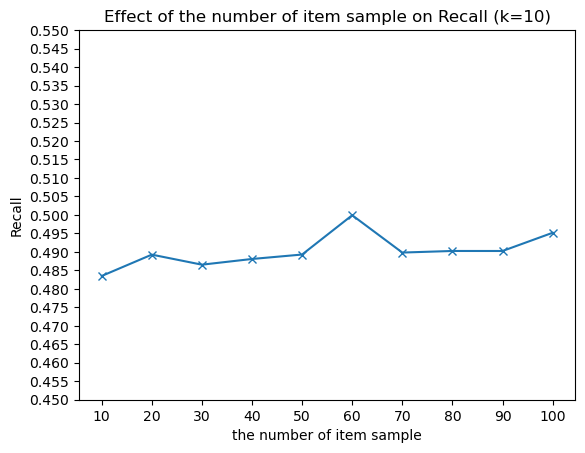

In [18]:
plt.plot(n_item_samples, re3, marker='x')
plt.title('Effect of the number of item sample on Recall (k=10)')
plt.xlabel('the number of item sample')
plt.ylabel('Recall')
plt.ylim(0.45, 0.55)
plt.xticks(n_item_samples)
plt.yticks(np.arange(0.45, 0.55, 0.005))
plt.show()

# The number of user sample
The number of sampling to computing parameters of the distribution of distances from a specific item to all users.

In [22]:
n_item_sample = 100
n_user_samples = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

re4 = []
for n_user_sample in n_user_samples:
    print(f'n_item_sample={n_item_sample}')
    print(f'n_user_sample={n_user_sample}')
    model = models.MutualProximityCML(
        n_user, n_item, dist, n_dim,
        n_item_sample=n_item_sample,
        n_user_sample=n_user_sample
    ).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = losses.SumTripletLoss(margin=1).to(device)
    trainer = trainers.BaseTrainer(model, optimizer, criterion, sampler, no_progressbar)
    trainer.fit(n_batch, n_epoch, recall, valid_per_epoch)
    display(trainer.valid_scores)
    # k=10を追加
    re4.append(trainer.valid_scores.iloc[-1, 1])

n_item_sample=100
n_user_sample=10


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.061983,0.125685,0.522816,0,NaN
0,0.321879,0.481125,0.847875,50,0.232471


n_item_sample=100
n_user_sample=20


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.068847,0.132709,0.526680,0,NaN
0,0.321553,0.490463,0.853202,50,0.234564


n_item_sample=100
n_user_sample=30


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.062112,0.125224,0.524540,0,NaN
0,0.327245,0.488198,0.853139,50,0.233864


n_item_sample=100
n_user_sample=40


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.060836,0.119344,0.527922,0,NaN
0,0.320233,0.487642,0.852247,50,0.235064


n_item_sample=100
n_user_sample=50


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.064395,0.127194,0.523347,0,NaN
0,0.323814,0.484669,0.852282,50,0.239174


n_item_sample=100
n_user_sample=60


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.060729,0.126224,0.519113,0,NaN
0,0.319522,0.486445,0.852312,50,0.23607


n_item_sample=100
n_user_sample=70


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.053405,0.116958,0.524495,0,NaN
0,0.328071,0.496425,0.855596,50,0.232909


n_item_sample=100
n_user_sample=80


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.063163,0.120214,0.523292,0,NaN
0,0.326672,0.490182,0.851082,50,0.234711


n_item_sample=100
n_user_sample=90


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.065555,0.121502,0.519641,0,NaN
0,0.326307,0.488333,0.857627,50,0.23406


n_item_sample=100
n_user_sample=100


,Recall@5,Recall@10,Recall@50,epoch,losses
0,0.061311,0.127557,0.526988,0,NaN
0,0.325188,0.484141,0.852791,50,0.237063


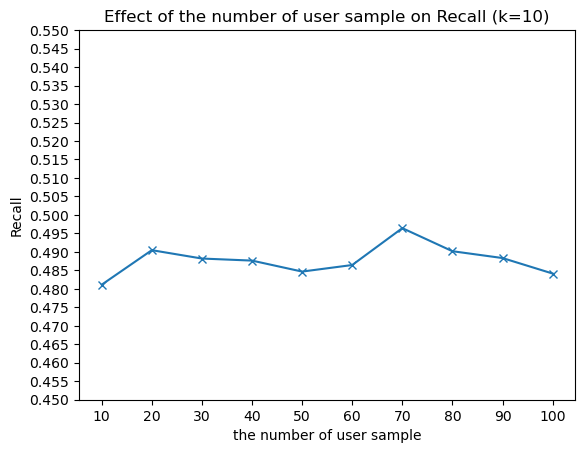

In [23]:
plt.plot(n_user_samples, re4, marker='x')
plt.title('Effect of the number of user sample on Recall (k=10)')
plt.xlabel('the number of user sample')
plt.ylabel('Recall')
plt.ylim(0.45, 0.55)
plt.xticks(n_user_samples)
plt.yticks(np.arange(0.45, 0.55, 0.005))
plt.show()